In [76]:
# importing necessary libraries

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
# loading dataset
df = pd.read_csv('sample2.csv')

X = df.drop(['Segment'], axis=1)
y = df['Segment'] 

In [79]:
# Scaling the dataset
scalar = StandardScaler()

scalar = scalar.fit(X)

X = scalar.transform(X)

In [80]:
# Splitting test and train dataset and fit with KNN

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, train_size=0.80, random_state=16)
KNN = KNeighborsClassifier(n_neighbors=13, weights="distance")
KNN.fit(X_train, y_train)

In [83]:
# Predict the value for the test dataset using KNN and Checking the classification report

y_pred = KNN.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.95      0.97       370
           1       0.96      0.98      0.97       762
           2       0.95      0.94      0.95       403
           3       0.92      0.93      0.92       257
           4       0.73      0.79      0.76       101
           5       0.98      0.98      0.98      1299

    accuracy                           0.96      3192
   macro avg       0.92      0.93      0.92      3192
weighted avg       0.96      0.96      0.96      3192



Text(0.5, 1.0, 'Confusion Matrix')

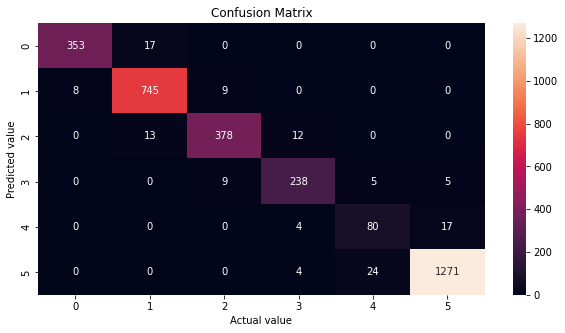

In [84]:
# Plotting confusion matrix

conf = confusion_matrix(y_test, y_pred)

plt.figure(figsize =(10,5))
ax = sns.heatmap(conf, annot=True, fmt='d')
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted value')
ax.set_title('Confusion Matrix')

In [85]:
# assing max k value of 40
k_values = 100

errors = []
f1_scores = []

for i in range(1,k_values):
    
    # tuning n_neighbors
    KNN.set_params(n_neighbors = i, weights="distance")
    
    KNN.fit(X_train, y_train)
    
    y_predict_KNN = KNN.predict(X_test)
    
    f1_scores.append((i,f1_score(y_test, y_predict_KNN,average='weighted')))
    
    errors.append((i, 1-accuracy_score(y_test, y_predict_KNN)))

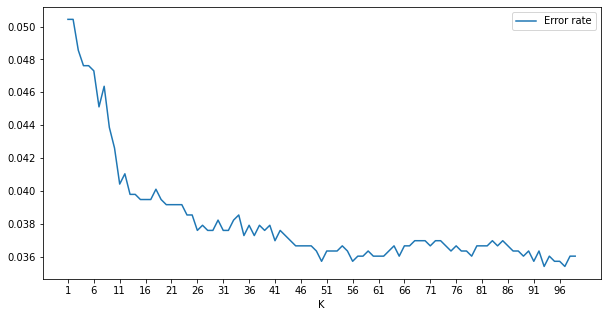

In [86]:
# Ploting error values for various n_neighbors
errors = pd.DataFrame(errors, columns=['K', 'Error rate'])

ax = errors.set_index('K').plot(figsize=(10,5))
ax.set_xticks(range(1, 100, 5));

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       370
           1       0.96      0.98      0.97       762
           2       0.96      0.94      0.95       403
           3       0.93      0.94      0.94       257
           4       0.76      0.82      0.79       101
           5       0.99      0.98      0.98      1299

    accuracy                           0.96      3192
   macro avg       0.93      0.94      0.93      3192
weighted avg       0.96      0.96      0.96      3192



Text(0.5, 1.0, 'Confusion Matrix')

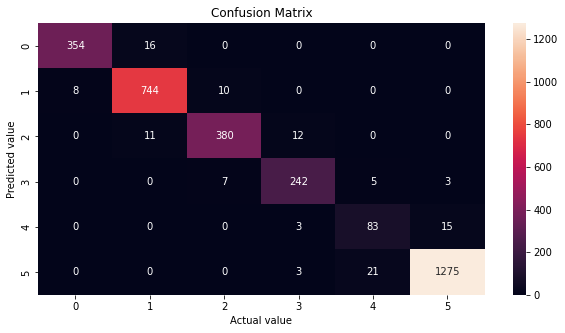

In [87]:
# best accuracy

KNN = KNeighborsClassifier(n_neighbors=50, weights="distance")

KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

print(classification_report(y_test, y_pred))

conf = confusion_matrix(y_test, y_pred)

plt.figure(figsize =(10,5))
ax = sns.heatmap(conf, annot=True, fmt='d')
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted value')
ax.set_title('Confusion Matrix')

In [64]:
# Predict the segment for the given latitude and longitude 

predictVal = pd.DataFrame([[-111.11882797777,31.827885766489995],[-111.11900238381,31.828120040789994], [-111.11918049242,31.828439772270002]], columns=['Latitude','Longitude'])

predictVal = scalar.transform(predictVal)

print(KNN.predict(predictVal))

[2 5 4]
